In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform, randint
A
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske
from pprint import pprint
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/Machine_L/ML_DATA 1.xlsx")
df.head(150)

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var,label
0,cha3ebi.00001.1.wav,0.319671,0.087968,0.070414,0.001262,3244.023611,403053.598206,2904.767224,183083.233493,6874.723558,...,44.294231,49.402912,52.851425,45.825806,46.013962,45.749512,45.108154,32.215000,32.820744,cha3ebi
1,cha3ebi.00001.2.wav,0.345776,0.089449,0.094138,0.000479,3223.041546,171900.411453,2934.685036,33470.068733,6948.267728,...,33.922108,41.565216,43.218231,57.144268,36.732399,29.397629,36.487320,37.395409,29.603054,cha3ebi
2,cha3ebi.00001.3.wav,0.387464,0.089348,0.095453,0.000512,3265.357515,162535.384149,2961.276932,36319.380305,7024.048039,...,47.599468,44.428135,54.099331,70.516243,50.916405,38.351006,40.162621,28.256876,31.472727,cha3ebi
3,cha3ebi.00001.4.wav,0.367147,0.086613,0.097967,0.000376,3363.256276,214213.871469,2973.248915,28554.295163,7117.883113,...,54.671959,58.082153,50.861141,43.112251,53.600922,40.270191,38.376202,51.250301,50.483135,cha3ebi
4,cha3ebi.00001.5.wav,0.380412,0.087970,0.097331,0.000429,3443.874882,198162.972301,3047.481179,48289.351766,7315.077562,...,37.271408,60.862453,58.411732,71.351913,45.708241,55.908375,63.883549,54.582371,58.114979,cha3ebi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,cha3ebi.000015.6.wav,0.356468,0.094245,0.168491,0.003779,2110.264252,151606.298530,2425.249415,133472.714507,4532.822078,...,62.492329,41.439655,61.101822,55.596115,35.213852,37.985943,71.202538,121.223206,191.742065,cha3ebi
146,cha3ebi.000015.7.wav,0.363349,0.093694,0.169588,0.003706,2081.184028,57357.916299,2396.771806,38031.297286,4378.611215,...,66.126610,40.429039,65.582855,55.550179,67.038177,39.338726,71.621208,131.153946,141.264633,cha3ebi
147,cha3ebi.000015.8.wav,0.347752,0.093834,0.173025,0.003537,2092.555887,88628.282421,2412.252541,91769.392140,4466.317608,...,77.162933,48.235390,60.803818,44.583435,37.202660,33.092590,76.090363,166.357361,192.201874,cha3ebi
148,cha3ebi.000015.9.wav,0.369766,0.087919,0.170254,0.004740,2389.421454,686972.363819,2539.784079,117161.987609,5032.309570,...,54.577656,54.648979,41.972363,58.723488,49.321220,29.195646,57.691746,90.451401,142.779083,cha3ebi


In [ ]:
print("Dataset has",df.shape)
df.label.value_counts().reset_index()

Dataset has (20940, 55)


,label,count
0,charki,3000
1,gnawa,3000
2,rap,3000
3,tachlhit,3000
4,ta9to9a,2990
5,ray,2980
6,cha3ebi,2970


In [ ]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

### **Normalisation**


In [ ]:
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

### **find all columns with any NA values**

In [ ]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


### **Encode Genre Label**

In [ ]:
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'cha3ebi': 0, 'charki': 1, 'gnawa': 2, 'rap': 3, 'ray': 4, 'ta9to9a': 5, 'tachlhit': 6}
{0: 'cha3ebi', 1: 'charki', 2: 'gnawa', 3: 'rap', 4: 'ray', 5: 'ta9to9a', 6: 'tachlhit'}


### **Split DATA Set**

In [ ]:
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [ ]:
# remove irrelevant columns
df_shuffle.drop(['filename'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [ ]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 14657 records out of 20940 which is 70%
Dev set has 4146 records out of 20940 which is 20%
Test set has 2137 records out of 20940 which is 10%


### **Scale the Features**

In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [ ]:
def predictProba(clf, X, dev=False):
    y_true = y_train
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

In [ ]:
lr = LogisticRegression(random_state=seed)
lr.fit(X_train,y_train)
predictProba(lr, X_train)
predictProba(lr, X_train, dev=True)

              precision    recall  f1-score   support

     cha3ebi      0.738     0.756     0.746      2079
      charki      0.663     0.616     0.639      2100
       gnawa      0.797     0.838     0.817      2100
         rap      0.830     0.834     0.832      2100
         ray      0.664     0.625     0.644      2086
     ta9to9a      0.754     0.780     0.767      2093
    tachlhit      0.679     0.690     0.684      2099

    accuracy                          0.734     14657
   macro avg      0.732     0.734     0.733     14657
weighted avg      0.732     0.734     0.733     14657

              precision    recall  f1-score   support

     cha3ebi      0.712     0.728     0.720       588
      charki      0.620     0.556     0.586       594
       gnawa      0.790     0.842     0.815       594
         rap      0.828     0.816     0.822       594
         ray      0.645     0.617     0.631       590
     ta9to9a      0.750     0.769     0.759       592
    tachlhit      0.642 

### **Permutation Importance Feature Selection**

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=bcb27765f8dceb8a585662cc14379aac2c815576b94832bcb998bdc4e70964d9
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(lr, random_state=seed).fit(X_train, y_train, n_iter=10)
print("Feature Importances using Permutation Importance")
eli5.show_weights(perm, feature_names = X_dev.columns.tolist())

Feature Importances using Permutation Importance


Weight,Feature
0.2373 ± 0.0041,spectral_bandwidth_mean
0.2177 ± 0.0058,mfcc2_mean
0.2152 ± 0.0027,spectral_centroid_mean
0.2027 ± 0.0048,zero_crossing_rate_mean
0.1192 ± 0.0058,rolloff_mean
0.1086 ± 0.0055,mfcc3_mean
0.0606 ± 0.0027,mfcc1_mean
0.0601 ± 0.0048,mfcc4_mean
0.0570 ± 0.0022,rms_mean
0.0551 ± 0.0019,mfcc5_mean


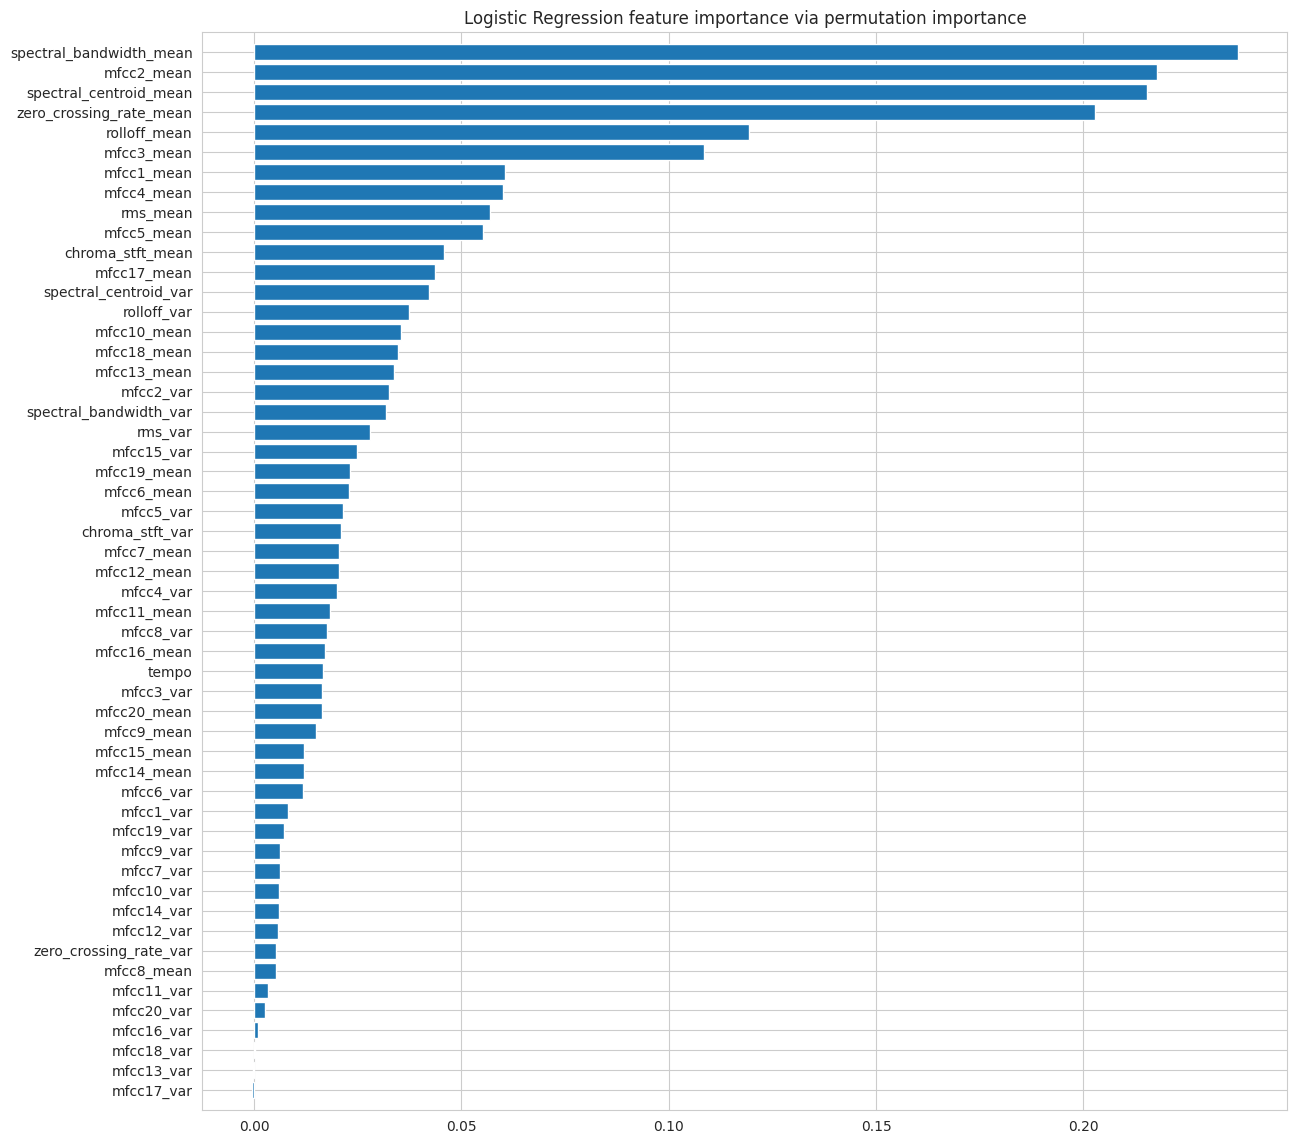

In [ ]:
# plot the permutation importances
perm_indices = np.argsort(perm.feature_importances_)[::-1]
perm_features = [X_dev.columns.tolist()[xx] for xx in perm_indices]
plt.figure(figsize=(14, 14))
plt.title("Logistic Regression feature importance via permutation importance")
plt.barh(range(X_dev.shape[1]), perm.feature_importances_[perm_indices])
plt.yticks(range(X_dev.shape[1]), perm_features)
plt.ylim([X_dev.shape[1], -1])
plt.show()

# **Train**

### **LogisticRegression**

In [ ]:
lr = LogisticRegression()
X_train_perm = X_train[perm_features[:30]]
X_train_rfe = X_train_perm
lr.fit(X_train_rfe,y_train)
predictProba(lr, X_train_rfe)
predictProba(lr, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      0.690     0.715     0.702      2079
      charki      0.611     0.555     0.582      2100
       gnawa      0.757     0.800     0.778      2100
         rap      0.805     0.812     0.808      2100
         ray      0.620     0.574     0.596      2086
     ta9to9a      0.708     0.749     0.728      2093
    tachlhit      0.623     0.626     0.625      2099

    accuracy                          0.690     14657
   macro avg      0.688     0.690     0.688     14657
weighted avg      0.688     0.690     0.688     14657

              precision    recall  f1-score   support

     cha3ebi      0.662     0.679     0.670       588
      charki      0.573     0.529     0.550       594
       gnawa      0.754     0.793     0.773       594
         rap      0.802     0.805     0.803       594
         ray      0.605     0.573     0.588       590
     ta9to9a      0.686     0.733     0.709       592
    tachlhit      0.591 

### **Random Forest**

In [ ]:
rfc = ske.RandomForestClassifier(random_state=seed, n_jobs=-1)
rfc.fit(X_train_rfe, y_train)
predictProba(rfc, X_train_rfe)
predictProba(rfc, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      1.000     0.998     0.999      2079
      charki      1.000     0.999     1.000      2100
       gnawa      0.991     1.000     0.995      2100
         rap      1.000     0.995     0.998      2100
         ray      1.000     1.000     1.000      2086
     ta9to9a      1.000     0.998     0.999      2093
    tachlhit      0.998     0.999     0.999      2099

    accuracy                          0.998     14657
   macro avg      0.998     0.998     0.998     14657
weighted avg      0.998     0.998     0.998     14657

              precision    recall  f1-score   support

     cha3ebi      0.958     0.895     0.925       588
      charki      0.861     0.852     0.856       594
       gnawa      0.943     0.970     0.956       594
         rap      0.858     0.944     0.899       594
         ray      0.937     0.914     0.925       590
     ta9to9a      0.943     0.970     0.956       592
    tachlhit      0.963 

### **AdaBoost**

In [ ]:
abc = ske.AdaBoostClassifier(n_estimators=150, random_state=seed)
abc.fit(X_train_rfe, y_train)
predictProba(abc, X_train_rfe)
predictProba(abc, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      0.639     0.636     0.638      2079
      charki      0.537     0.453     0.491      2100
       gnawa      0.776     0.765     0.770      2100
         rap      0.680     0.844     0.753      2100
         ray      0.569     0.493     0.528      2086
     ta9to9a      0.615     0.745     0.674      2093
    tachlhit      0.628     0.537     0.579      2099

    accuracy                          0.639     14657
   macro avg      0.635     0.639     0.633     14657
weighted avg      0.635     0.639     0.633     14657

              precision    recall  f1-score   support

     cha3ebi      0.615     0.628     0.621       588
      charki      0.512     0.406     0.453       594
       gnawa      0.746     0.697     0.721       594
         rap      0.661     0.845     0.742       594
         ray      0.558     0.486     0.520       590
     ta9to9a      0.604     0.731     0.662       592
    tachlhit      0.614 

### **GBC(GradientBoostingClassifier)**

In [ ]:
gbc = ske.GradientBoostingClassifier(n_estimators=100, random_state=seed)
gbc.fit(X_train_rfe, y_train)
predictProba(gbc, X_train_rfe)
predictProba(gbc, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      0.927     0.909     0.918      2079
      charki      0.863     0.844     0.853      2100
       gnawa      0.932     0.966     0.949      2100
         rap      0.942     0.930     0.936      2100
         ray      0.878     0.884     0.881      2086
     ta9to9a      0.913     0.943     0.928      2093
    tachlhit      0.928     0.909     0.919      2099

    accuracy                          0.912     14657
   macro avg      0.912     0.912     0.912     14657
weighted avg      0.912     0.912     0.912     14657

              precision    recall  f1-score   support

     cha3ebi      0.877     0.825     0.850       588
      charki      0.767     0.739     0.753       594
       gnawa      0.897     0.912     0.905       594
         rap      0.854     0.889     0.871       594
         ray      0.800     0.800     0.800       590
     ta9to9a      0.847     0.907     0.876       592
    tachlhit      0.873 

### **XGBoost**

In [ ]:
import xgboost as xgb
print(xgb.__version__)

2.0.3


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Sample labels
y = ['cha3ebi', 'charki', 'gnawa', 'rap', 'ray', 'ta9to9a', 'tachlhit']
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the labels
y_encoded = label_encoder.fit_transform(y)
X_train_rfe

,spectral_bandwidth_mean,mfcc2_mean,spectral_centroid_mean,zero_crossing_rate_mean,rolloff_mean,mfcc3_mean,mfcc1_mean,mfcc4_mean,rms_mean,mfcc5_mean,...,mfcc15_var,mfcc19_mean,mfcc6_mean,mfcc5_var,chroma_stft_var,mfcc7_mean,mfcc12_mean,mfcc4_var,mfcc11_mean,mfcc8_var
0,-0.050409,0.437976,-0.628480,-0.840951,-0.462554,0.389602,0.192839,-0.132441,0.631334,0.759643,...,0.116036,0.940504,0.808099,-0.874903,0.208703,0.603578,0.307646,-0.433839,0.059196,-0.688710
1,-0.470070,0.916719,-0.706044,-0.913764,-0.467613,0.296492,-0.279791,-0.416084,-0.614865,-1.415953,...,1.338402,0.747640,0.032833,4.535244,-0.588682,0.214987,0.744089,0.636260,-0.173642,1.226214
2,1.036750,-0.495079,1.044746,0.034074,1.181174,0.168001,1.253267,-0.954278,2.281208,0.373011,...,-0.584618,-0.067311,-1.227266,-0.194802,-0.421146,-1.073620,-0.248880,-0.057309,0.270219,0.204707
3,-0.752637,1.566507,-1.462461,-1.293519,-1.613153,0.383721,-3.222248,-0.723021,-1.978788,0.191279,...,-0.784596,0.551041,-0.689462,-1.080062,-1.143618,-0.182347,1.767284,-1.339611,1.751788,-1.209061
4,0.167474,0.662424,-0.655497,-0.767683,-0.609821,1.764349,-1.007454,0.285366,-1.111445,0.975677,...,0.493892,0.100124,-0.090474,0.066316,0.778995,0.853863,-0.094484,2.795409,-0.064284,0.165669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14652,1.277100,-0.952819,1.681076,0.800519,1.536120,-0.046260,1.350842,-0.929421,2.144594,0.389022,...,-0.611455,-0.251738,-1.136681,-0.138208,-1.210591,-0.266986,-0.457869,0.371725,0.091945,-0.775141
14653,-0.474383,0.895073,-0.499640,0.036629,-0.821696,-1.266310,-0.241619,0.150224,-0.873062,0.811624,...,1.120081,-1.392077,-1.849419,2.410716,0.131071,1.694382,-0.952154,0.852238,1.219891,1.418411
14654,-0.055410,0.085010,-0.344130,-0.488113,-0.255910,-0.598321,0.005830,-0.204462,-0.117485,0.760962,...,0.429619,0.505803,0.319827,-0.423224,1.254705,1.602784,-0.079520,0.104443,-0.304050,-0.588816
14655,0.894950,-1.272625,1.384438,1.300534,1.138868,1.079381,0.108523,0.369531,-0.580488,-1.284437,...,0.052407,-0.350181,0.694905,0.216916,0.733696,-0.023793,0.729542,0.468191,0.287148,0.473473


In [ ]:
import sklearn.metrics as skm
def predictProba1(clf, X, y_true,dev=False):
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

def predictProba2(clf, X, y_true, dev=False):
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev_encoded  # Assuming y_dev_encoded is the encoded labels for development set
    y_pred_proba_X = clf.predict_proba(X)
    y_pred_X = clf.predict(X)
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")


from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit LabelEncoder on the target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)
y_dev_encoded= label_encoder.fit_transform(y_dev)


xgbc = xgb.XGBClassifier(n_estimators=100, random_state=seed)
xgbc.fit(X_train_rfe, y_train_encoded)
predictProba1(xgbc, X_train_rfe, y_train_encoded)
predictProba2(xgbc, X_train_rfe, y_dev_encoded,True)

              precision    recall  f1-score   support

           0      1.000     0.998     0.999      2079
           1      1.000     0.999     1.000      2100
           2      0.985     1.000     0.993      2100
           3      1.000     0.995     0.998      2100
           4      1.000     1.000     1.000      2086
           5      1.000     0.998     0.999      2093
           6      1.000     0.995     0.998      2099

    accuracy                          0.998     14657
   macro avg      0.998     0.998     0.998     14657
weighted avg      0.998     0.998     0.998     14657

              precision    recall  f1-score   support

           0      0.957     0.917     0.937       588
           1      0.880     0.899     0.889       594
           2      0.955     0.973     0.964       594
           3      0.926     0.944     0.935       594
           4      0.945     0.937     0.941       590
           5      0.954     0.976     0.965       592
           6      0.967 

### **CatBoost**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
import catboost as cb
print(cb.__version__)

1.2.5


In [ ]:
cbc = cb.CatBoostClassifier(random_state=seed, verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
cbc.fit(X_train_rfe, y_train)
predictProba(cbc, X_train_rfe)
predictProba(cbc, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      0.997     0.991     0.994      2079
      charki      0.989     0.988     0.988      2100
       gnawa      0.983     1.000     0.991      2100
         rap      0.999     0.992     0.995      2100
         ray      0.991     0.993     0.992      2086
     ta9to9a      0.996     0.996     0.996      2093
    tachlhit      0.997     0.992     0.995      2099

    accuracy                          0.993     14657
   macro avg      0.993     0.993     0.993     14657
weighted avg      0.993     0.993     0.993     14657

              precision    recall  f1-score   support

     cha3ebi      0.953     0.900     0.926       588
      charki      0.891     0.880     0.886       594
       gnawa      0.946     0.978     0.962       594
         rap      0.926     0.949     0.938       594
         ray      0.935     0.932     0.934       590
     ta9to9a      0.943     0.970     0.956       592
    tachlhit      0.949 

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
cls = knn()
cls.fit(X_train_rfe, y_train)
predictProba(cls, X_train_rfe)
predictProba(cls, X_train_rfe, True)

              precision    recall  f1-score   support

     cha3ebi      0.968     0.969     0.969      2079
      charki      0.961     0.925     0.943      2100
       gnawa      0.957     0.990     0.973      2100
         rap      0.974     0.958     0.966      2100
         ray      0.969     0.975     0.972      2086
     ta9to9a      0.970     0.986     0.978      2093
    tachlhit      0.978     0.976     0.977      2099

    accuracy                          0.968     14657
   macro avg      0.968     0.968     0.968     14657
weighted avg      0.968     0.968     0.968     14657

              precision    recall  f1-score   support

     cha3ebi      0.955     0.930     0.942       588
      charki      0.910     0.891     0.900       594
       gnawa      0.930     0.978     0.953       594
         rap      0.948     0.921     0.934       594
         ray      0.942     0.969     0.956       590
     ta9to9a      0.955     0.971     0.963       592
    tachlhit      0.972 

# **Model Evaluation**

### **LogisticRegression**

In [ ]:
y_pred_X = lr.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("Ir Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.676     0.716     0.696       303
      charki      0.600     0.559     0.579       306
       gnawa      0.764     0.804     0.783       306
         rap      0.820     0.817     0.818       306
         ray      0.639     0.576     0.606       304
     ta9to9a      0.717     0.774     0.744       305
    tachlhit      0.638     0.625     0.632       307

    accuracy                          0.696      2137
   macro avg      0.693     0.696     0.694      2137
weighted avg      0.693     0.696     0.694      2137

Ir Test Accuracy  69.58352831071596


### **Random Forest**

In [ ]:
y_pred_X = rfc.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("RF Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.937     0.931     0.934       303
      charki      0.854     0.863     0.859       306
       gnawa      0.925     0.971     0.947       306
         rap      0.903     0.938     0.920       306
         ray      0.945     0.905     0.924       304
     ta9to9a      0.967     0.951     0.959       305
    tachlhit      0.953     0.922     0.937       307

    accuracy                          0.926      2137
   macro avg      0.926     0.926     0.926      2137
weighted avg      0.926     0.926     0.926      2137

RF Test Accuracy  92.55966307908282


### **AdaBoost**

In [ ]:
y_pred_X = abc.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("abc Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.622     0.591     0.606       303
      charki      0.504     0.412     0.453       306
       gnawa      0.760     0.712     0.735       306
         rap      0.656     0.817     0.728       306
         ray      0.543     0.493     0.517       304
     ta9to9a      0.590     0.721     0.649       305
    tachlhit      0.596     0.547     0.570       307

    accuracy                          0.613      2137
   macro avg      0.610     0.613     0.608      2137
weighted avg      0.610     0.613     0.608      2137

abc Test Accuracy  61.34768366869443


### **GBC(GradientBoostingClassifier)**

In [ ]:
y_pred_X = gbc.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("GBC Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.858     0.875     0.866       303
      charki      0.763     0.735     0.749       306
       gnawa      0.898     0.951     0.924       306
         rap      0.894     0.882     0.888       306
         ray      0.805     0.789     0.797       304
     ta9to9a      0.873     0.898     0.885       305
    tachlhit      0.851     0.818     0.834       307

    accuracy                          0.850      2137
   macro avg      0.849     0.850     0.849      2137
weighted avg      0.849     0.850     0.849      2137

GBC Test Accuracy  84.97894244267665


### **XGBoost**

In [ ]:
y_pred_X = xgbc.predict(X_test[X_train_rfe.columns])
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit LabelEncoder on the target variable and transform it
y_pred_X_encoded = label_encoder.fit_transform(y_pred_X)
y_test_encoded=label_encoder.fit_transform(y_test)
print(skm.classification_report(y_test_encoded, y_pred_X_encoded, digits=3))
print("XGB Test Accuracy ",abs(skm.accuracy_score(y_test_encoded, y_pred_X_encoded)*100))

              precision    recall  f1-score   support

           0      0.941     0.944     0.942       303
           1      0.866     0.863     0.864       306
           2      0.929     0.980     0.954       306
           3      0.929     0.944     0.937       306
           4      0.944     0.944     0.944       304
           5      0.980     0.948     0.963       305
           6      0.966     0.928     0.947       307

    accuracy                          0.936      2137
   macro avg      0.936     0.936     0.936      2137
weighted avg      0.936     0.936     0.936      2137

XGB Test Accuracy  93.58914365933552


### **CatBoost**

In [ ]:
y_pred_X = cbc.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("cbc Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.947     0.937     0.942       303
      charki      0.866     0.886     0.876       306
       gnawa      0.938     0.987     0.962       306
         rap      0.950     0.931     0.941       306
         ray      0.940     0.931     0.936       304
     ta9to9a      0.970     0.957     0.964       305
    tachlhit      0.967     0.945     0.956       307

    accuracy                          0.939      2137
   macro avg      0.940     0.939     0.939      2137
weighted avg      0.940     0.939     0.939      2137

cbc Test Accuracy  93.9167056621432


### **KNN**

In [ ]:
y_pred_X = cls.predict(X_test[X_train_rfe.columns])
print(skm.classification_report(y_test, y_pred_X, digits=3))
print("KNN Test Accuracy ",abs(skm.accuracy_score(y_test, y_pred_X)*100))

              precision    recall  f1-score   support

     cha3ebi      0.941     0.954     0.948       303
      charki      0.916     0.889     0.902       306
       gnawa      0.925     0.971     0.947       306
         rap      0.959     0.915     0.936       306
         ray      0.954     0.957     0.956       304
     ta9to9a      0.949     0.977     0.963       305
    tachlhit      0.963     0.945     0.954       307

    accuracy                          0.944      2137
   macro avg      0.944     0.944     0.944      2137
weighted avg      0.944     0.944     0.944      2137

KNN Test Accuracy  94.38465138043986


### **Load testing data**

In [ ]:
audio_fp = '/content/drive/MyDrive/Deep_L/audio_wav 1/gnawa/107.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)
audio_data = audio_data[:661500]
collection = np.split(audio_data,10)
audio_data = collection[3]

In [ ]:
IPython.display.Audio(audio_data, rate=sr)

In [ ]:
d = librosa.feature.mfcc(y=np.array(audio_data).flatten(), sr=22050, n_mfcc=20) #36565
d_var = d.var(axis=1).tolist()
d_mean = d.mean(axis=1).tolist()
test_data = []#[d_var + d_mean]
for i in range(20):
  test_data.append(d_mean[i])
  test_data.append(d_var[i])
mfcc_names=[]
for i in range(1,21):
  mfcc_str = "mfcc"+str(i)+"_mean"
  mfcc_names.append(mfcc_str)
  mfcc_str = "mfcc"+str(i)+"_var"
  mfcc_names.append(mfcc_str)
test_frame = pd.DataFrame([test_data], columns = mfcc_names)
test_data = []
mfcc_names=[]
#chroma
S = np.abs(librosa.stft(audio_data, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
#chroma_stft_mean
chroma_mean = round(np.mean(chroma),6)
test_data.append(chroma_mean)
#chrome_stft_var
chroma_var = round(np.var(chroma),6)
test_data.append(chroma_var)
#chroma_label
mfcc_names.append("chroma_stft_mean")
mfcc_names.append("chroma_stft_var")

#rms
rms = librosa.feature.rms(y=audio_data)
#rms_mean
rms_mean = round(np.mean(rms),6)
test_data.append(rms_mean)
#rms_var
rms_var = round(np.var(rms),6)
test_data.append(rms_var)
#rms_label
mfcc_names.append("rms_mean")
mfcc_names.append("rms_var")

#spectral_centroid
cent = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
#spectral_centroid_mean
sc_mean = round(np.mean(cent),6)
test_data.append(sc_mean)
#spectral_centroid_var
sc_var = round(np.var(cent),6)
test_data.append(sc_var)
#sc_label
mfcc_names.append("spectral_centroid_mean")
mfcc_names.append("spectral_centroid_var")

#spectral_bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
#spectral_bandwidth_mean
spec_bw_mean = round(np.mean(spec_bw),6)
test_data.append(spec_bw_mean)
#spectral_bandwidth_var
spec_bw_var = round(np.var(spec_bw),6)
test_data.append(spec_bw_var)
#sb_label
mfcc_names.append("spectral_bandwidth_mean")
mfcc_names.append("spectral_bandwidth_var")
#rolloff
rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
#rolloff_mean
rolloff_mean = round(np.mean(rolloff),6)
test_data.append(rolloff_mean)
#rolloff_var
rolloff_var = round(np.var(rolloff),6)
test_data.append(rolloff_var)
#rolloff_label
mfcc_names.append("rolloff_mean")
mfcc_names.append("rolloff_var")

#zero_crossing_rate
zcr = librosa.feature.zero_crossing_rate(audio_data)
#zero_crossing_rate_mean
zcr_mean = round(np.mean(zcr),6)
test_data.append(zcr_mean)
#zero_crossing_rate_var
zcr_var = round(np.var(zcr),6)
test_data.append(zcr_var)
#zero_crossing_rate_label
mfcc_names.append("zero_crossing_rate_mean")
mfcc_names.append("zero_crossing_rate_var")


#perceptr_mean
#perceptr_var


#tempo
hop_length = 512
oenv = librosa.onset.onset_strength(y=audio_data, sr=sr, hop_length=hop_length)
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                          hop_length=hop_length)[0]

tempo = round(tempo,6)
test_data.append(tempo)
#tempo_label
mfcc_names.append("tempo")
d_var = d.var(axis=1).tolist()
d_mean = d.mean(axis=1).tolist()
#test_data = []#[d_var + d_mean]
for i in range(20):
  test_data.append(d_mean[i])
  test_data.append(d_var[i])
for i in range(1,21):
  mfcc_str = "mfcc"+str(i)+"_mean"
  mfcc_names.append(mfcc_str)
  mfcc_str = "mfcc"+str(i)+"_var"
  mfcc_names.append(mfcc_str)

# Assuming mfcc_names is defined correctly
test_frame = pd.DataFrame([test_data], columns=mfcc_names)

# Reorder the columns of test_frame to match X_train.columns
test_frame = test_frame[X_train.columns]

# Now you can apply the scaler
testing_frame = pd.DataFrame(scaler.transform(test_frame), columns=X_train.columns)
shorter_testing_frame = testing_frame[perm_features[:30]]

shorter_testing_frame


,spectral_bandwidth_mean,mfcc2_mean,spectral_centroid_mean,zero_crossing_rate_mean,rolloff_mean,mfcc3_mean,mfcc1_mean,mfcc4_mean,rms_mean,mfcc5_mean,...,mfcc15_var,mfcc19_mean,mfcc6_mean,mfcc5_var,chroma_stft_var,mfcc7_mean,mfcc12_mean,mfcc4_var,mfcc11_mean,mfcc8_var
0,-0.721754,1.25754,-1.491927,-1.774471,-1.370813,1.615189,-1.299895,0.41244,-0.969156,0.851926,...,-0.771889,0.621136,1.665374,-0.929427,0.678325,-0.076154,-0.852084,-0.566899,0.248456,-0.799813


In [ ]:
val=1
while(val<=9):
  audio_data = collection[val]
  d = librosa.feature.mfcc(y=np.array(audio_data).flatten(),sr=22050 , n_mfcc = 20) #36565
  d_var = d.var(axis=1).tolist()
  d_mean = d.mean(axis=1).tolist()
  test_data = []#[d_var + d_mean]
  for i in range(20):
    test_data.append(d_mean[i])
    test_data.append(d_var[i])
  mfcc_names=[]
  for i in range(1,21):
    mfcc_str = "mfcc"+str(i)+"_mean"
    mfcc_names.append(mfcc_str)
    mfcc_str = "mfcc"+str(i)+"_var"
    mfcc_names.append(mfcc_str)
  test_frame = pd.DataFrame([test_data], columns = mfcc_names)
  test_data = []
  mfcc_names=[]
  #chroma
  S = np.abs(librosa.stft(audio_data, n_fft=4096))**2
  chroma = librosa.feature.chroma_stft(S=S, sr=sr)
  #chroma_stft_mean
  chroma_mean = round(np.mean(chroma),6)
  test_data.append(chroma_mean)
  #chrome_stft_var
  chroma_var = round(np.var(chroma),6)
  test_data.append(chroma_var)
  #chroma_label
  mfcc_names.append("chroma_stft_mean")
  mfcc_names.append("chroma_stft_var")

  #rms
  rms = librosa.feature.rms(y=audio_data)
  #rms_mean
  rms_mean = round(np.mean(rms),6)
  test_data.append(rms_mean)
  #rms_var
  rms_var = round(np.var(rms),6)
  test_data.append(rms_var)
  #rms_label
  mfcc_names.append("rms_mean")
  mfcc_names.append("rms_var")

  #spectral_centroid
  cent = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
  #spectral_centroid_mean
  sc_mean = round(np.mean(cent),6)
  test_data.append(sc_mean)
  #spectral_centroid_var
  sc_var = round(np.var(cent),6)
  test_data.append(sc_var)
  #sc_label
  mfcc_names.append("spectral_centroid_mean")
  mfcc_names.append("spectral_centroid_var")

  #spectral_bandwidth
  spec_bw = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
  #spectral_bandwidth_mean
  spec_bw_mean = round(np.mean(spec_bw),6)
  test_data.append(spec_bw_mean)
  #spectral_bandwidth_var
  spec_bw_var = round(np.var(spec_bw),6)
  test_data.append(spec_bw_var)
  #sb_label
  mfcc_names.append("spectral_bandwidth_mean")
  mfcc_names.append("spectral_bandwidth_var")

  #rolloff
  rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
  #rolloff_mean
  rolloff_mean = round(np.mean(rolloff),6)
  test_data.append(rolloff_mean)
  #rolloff_var
  rolloff_var = round(np.var(rolloff),6)
  test_data.append(rolloff_var)
  #rolloff_label
  mfcc_names.append("rolloff_mean")
  mfcc_names.append("rolloff_var")

  #zero_crossing_rate
  zcr = librosa.feature.zero_crossing_rate(audio_data)
  #zero_crossing_rate_mean
  zcr_mean = round(np.mean(zcr),6)
  test_data.append(zcr_mean)
  #zero_crossing_rate_var
  zcr_var = round(np.var(zcr),6)
  test_data.append(zcr_var)
  #zero_crossing_rate_label
  mfcc_names.append("zero_crossing_rate_mean")
  mfcc_names.append("zero_crossing_rate_var")

  #perceptr_mean
  #perceptr_var


  #tempo
  hop_length = 512
  oenv = librosa.onset.onset_strength(y=audio_data, sr=sr, hop_length=hop_length)
  tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                            hop_length=hop_length)[0]

  tempo = round(tempo,6)
  test_data.append(tempo)
  #tempo_label
  mfcc_names.append("tempo")
  d_var = d.var(axis=1).tolist()
  d_mean = d.mean(axis=1).tolist()
  #test_data = []#[d_var + d_mean]
  for i in range(20):
    test_data.append(d_mean[i])
    test_data.append(d_var[i])
  for i in range(1,21):
    mfcc_str = "mfcc"+str(i)+"_mean"
    mfcc_names.append(mfcc_str)
    mfcc_str = "mfcc"+str(i)+"_var"
    mfcc_names.append(mfcc_str)

  # Assuming mfcc_names is defined correctly
  test_frame2 = pd.DataFrame([test_data], columns=mfcc_names)

  # Reorder the columns of test_frame to match X_train.columns
  test_frame2 = test_frame2[X_train.columns]

  # Now you can apply the scaler
  testing_frame2 = pd.DataFrame(scaler.transform(test_frame2), columns=X_train.columns)
  shorter_testing_frame2 = testing_frame2[perm_features[:30]]
  df_test = pd.concat([shorter_testing_frame, shorter_testing_frame2])
  shorter_testing_frame = df_test
  val+=1

df_test

,spectral_bandwidth_mean,mfcc2_mean,spectral_centroid_mean,zero_crossing_rate_mean,rolloff_mean,mfcc3_mean,mfcc1_mean,mfcc4_mean,rms_mean,mfcc5_mean,...,mfcc15_var,mfcc19_mean,mfcc6_mean,mfcc5_var,chroma_stft_var,mfcc7_mean,mfcc12_mean,mfcc4_var,mfcc11_mean,mfcc8_var
0,-0.721754,1.257540,-1.491927,-1.774471,-1.370813,1.615189,-1.299895,0.412440,-0.969156,0.851926,...,-0.771889,0.621136,1.665374,-0.929427,0.678325,-0.076154,-0.852084,-0.566899,0.248456,-0.799813
0,-0.576902,1.108573,-1.200622,-1.578648,-1.126116,1.388996,-0.827319,0.214296,-0.563332,0.925192,...,-0.861611,0.391762,1.627795,-0.608300,1.637044,-0.460160,-0.684622,-0.775935,-0.041782,-0.590429
0,-0.859343,1.348411,-1.516911,-1.730477,-1.443584,1.633828,-1.070936,0.522507,-0.709417,0.874487,...,-0.794553,0.330088,1.406582,-0.418734,0.175308,-0.343860,-0.757612,-0.869943,0.101496,-0.103906
0,-0.721754,1.257540,-1.491927,-1.774471,-1.370813,1.615189,-1.299895,0.412440,-0.969156,0.851926,...,-0.771889,0.621136,1.665374,-0.929427,0.678325,-0.076154,-0.852084,-0.566899,0.248456,-0.799813
0,-0.760950,1.115603,-1.544730,-1.859496,-1.435479,1.703445,-1.329367,0.748058,-0.939537,1.155212,...,-1.051858,0.112169,1.882229,-0.909745,1.326046,-0.087477,-0.905741,-0.391368,0.115187,-0.930029
0,-0.925423,1.292258,-1.614960,-1.801558,-1.544176,1.375903,-1.573929,0.489842,-1.279080,1.437350,...,-0.969466,0.544047,1.918523,-0.790935,0.307414,-0.114700,-0.889649,-0.390820,-0.074466,-0.641174
0,-0.585564,1.067080,-1.254148,-1.606658,-1.130542,1.309540,-2.026449,0.366557,-1.678424,0.923443,...,-0.718102,-0.007323,1.712403,-0.565021,1.178803,0.036024,-0.269212,-0.246856,0.480977,-0.295693
0,-0.664847,1.184111,-1.370199,-1.649461,-1.352246,1.568887,-2.516012,0.560591,-1.795592,1.127836,...,-1.184249,0.117620,1.521729,-0.790636,0.485884,-0.082233,-0.828512,-0.656479,0.056908,-0.606284
0,-0.997829,0.192074,-1.429224,-1.748648,-1.429846,1.508938,-3.353201,0.035242,-1.882367,1.101967,...,-0.877599,0.629723,1.181421,-0.470115,1.710508,0.308634,-0.571473,-0.537553,0.435145,-1.049048
0,-1.821956,1.553737,-2.383015,-2.152951,-2.510950,2.439014,-2.280293,0.992097,-1.113014,1.444986,...,-0.981586,1.597765,2.840584,-0.718156,1.095919,0.285934,-0.302121,-0.523049,0.345981,-0.042513


In [ ]:
from collections import Counter
result_list=[]
models = {'Catboost':cbc, 'XGBoost':xgbc, 'Gradient Boosting':gbc, 'AdaBoost':abc, 'Random Forest':rfc, 'Linear Regression':lr, 'KNN':cls}
key_list = list(models.keys())
val_list = list(models.values())




for model in models.values():
  position = val_list.index(model)
  for i in range(10):
    test = model.predict(df_test[i:(i+1)])
    result_list.append(test)
  t = max(result_list, key = result_list.count)


  if t== [[0]] or t ==[['cha3ebi']]:
    genre_detected = 'cha3ebi'
  elif t== [[1]] or t==[['charki']]:
    genre_detected = 'charki'
  elif t== [[2]] or t==[['ray']]:
    genre_detected = 'ray'
  elif t== [[3]] or t==[['gnawa']]:
    genre_detected = 'gnawa'
  elif t== [[4]] or t==[['rap']]:
    genre_detected = 'rap'
  elif t== [[5]] or t==[['tachlhit']]:
    genre_detected = 'tachlhit'
  elif t== [[6]] or t==[['ta9to9a']]:
    genre_detected = 'ta9to9a'
  else:
    genre_detected = 'country'
  print("The tested genre with {} model is:  {}".format(key_list[position], genre_detected))

The tested genre with Catboost model is:  gnawa
The tested genre with XGBoost model is:  gnawa
The tested genre with Gradient Boosting model is:  gnawa
The tested genre with AdaBoost model is:  gnawa
The tested genre with Random Forest model is:  gnawa
The tested genre with Linear Regression model is:  gnawa
The tested genre with KNN model is:  gnawa
